**NAME :** AVINASH KUMAR PRAJAPATI &nbsp; **ROLL NUMBER :** 25901326

## Objective
- The objective of this experiment is to develop and evaluate a moderate-complexity regression model for predicting hourly bike rental demand using the [Kaggle Bike Sharing dataset](https://www.kaggle.com/competitions/bike-sharing-demand/data). Specifically, the study aims to apply a Decision Tree Regressor to capture the non-linear relationships between temporal, weather, and seasonal features and the target variable (count).
- The experiment further seeks to analyze the impact of model complexity control by tuning key hyperparameters (max_depth and min_samples_leaf) and to compare the performance of the tuned model against a baseline Decision Tree. Model performance is evaluated using appropriate regression metrics and visualizations to assess generalization and predictive accuracy.

**Step 1:** Google Drive into the Colab runtime, allowing access to files stored in the user’s Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 2 :** Extracts the compressed ZIP file containing the Kaggle dataset into a local directory

In [ ]:
import os

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/MLL_LAB"
os.chdir(BASE_PATH)
os.listdir()

['bike-sharing-demand.zip',
 'bike_data',
 'easy',
 'easy.ipynb',
 'hard.ipynb',
 'moderate.ipynb']

**Step 3 :** Imports Python libraries for data manipulation, visualization, modeling, and evaluation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


**Step 4 :** Reads the CSV files into Pandas DataFrames and displays initial rows and metadata.

In [ ]:
train_df = pd.read_csv("bike_data/train.csv")
test_df = pd.read_csv("bike_data/test.csv")

train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Step 6 :** Print the shape of the Train and Test Splitted dataset.

In [ ]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.info()

Train shape: (10886, 12)
Test shape: (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Step 7 :** Extracts hour, day, month, and year from the datetime column. That is doing Feature engineering to convert temporal data into model-usable features.

In [ ]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year


**Step 8 :** Drop columns not useful for Decision Tree regression.

In [ ]:
train_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)


**Step 9 :** Feature–Target Split dimensions for recheck

In [ ]:
X = train_df.drop('count', axis=1)
y = train_df['count']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (10886, 12)
Target shape: (10886,)


**Step 10 :** Correlation Heatmap (Feature Understanding)

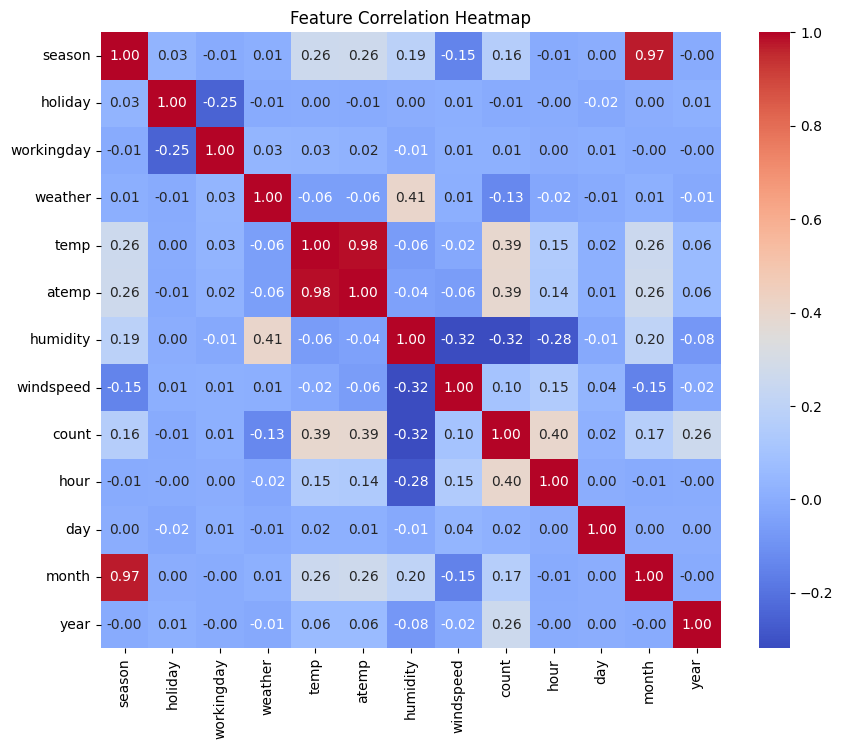

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Step 11 :** Train–Validation–Test Split > Train + Temp vs Test (70% / 30%)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)


**Step 12 :** Train–Validation–Test Split > Validation vs Test (15% / 15%)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


**Step 13 :** Print Split Sizes

In [ ]:
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

Training set: (7620, 12)
Validation set: (1633, 12)
Test set: (1633, 12)


**Step 14 :** Visualizing Dataset Splits for better understanding.

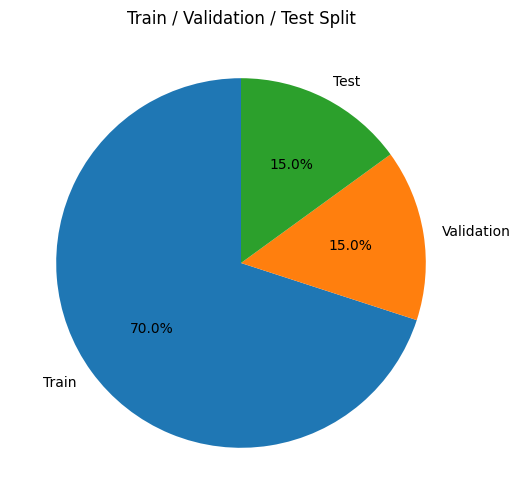

In [ ]:
labels = ['Train', 'Validation', 'Test']
sizes = [len(X_train), len(X_val), len(X_test)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Train / Validation / Test Split")
plt.show()

**Step 15 :** Feature Scaling (Standardization). Scales features to have zero mean and unit variance for convinience and better decisions.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


**Step 16 :** Importing Decision Tree Regression Model and the plot tree for training/fitting the model on the dataset and plotting the tree respectively

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

**Step 17 :** Fitting the DecisionTreeRegressor Model on the Training dataset.

In [ ]:
dt_baseline = DecisionTreeRegressor(random_state=42)
dt_baseline.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

**Step 18 :** Generates predictions on the validation set and computes error metrics.

In [ ]:
y_val_pred_base = dt_baseline.predict(X_val)

base_mse = mean_squared_error(y_val, y_val_pred_base)
base_r2 = r2_score(y_val, y_val_pred_base)

print("Baseline Decision Tree")
print("Validation MSE:", base_mse)
print("Validation R²:", base_r2)


Baseline Decision Tree
Validation MSE: 3549.814451928965
Validation R²: 0.889051499771684


**Step 19 :** Plotting the fitted Baseline DescisionTreeRegressor Model.

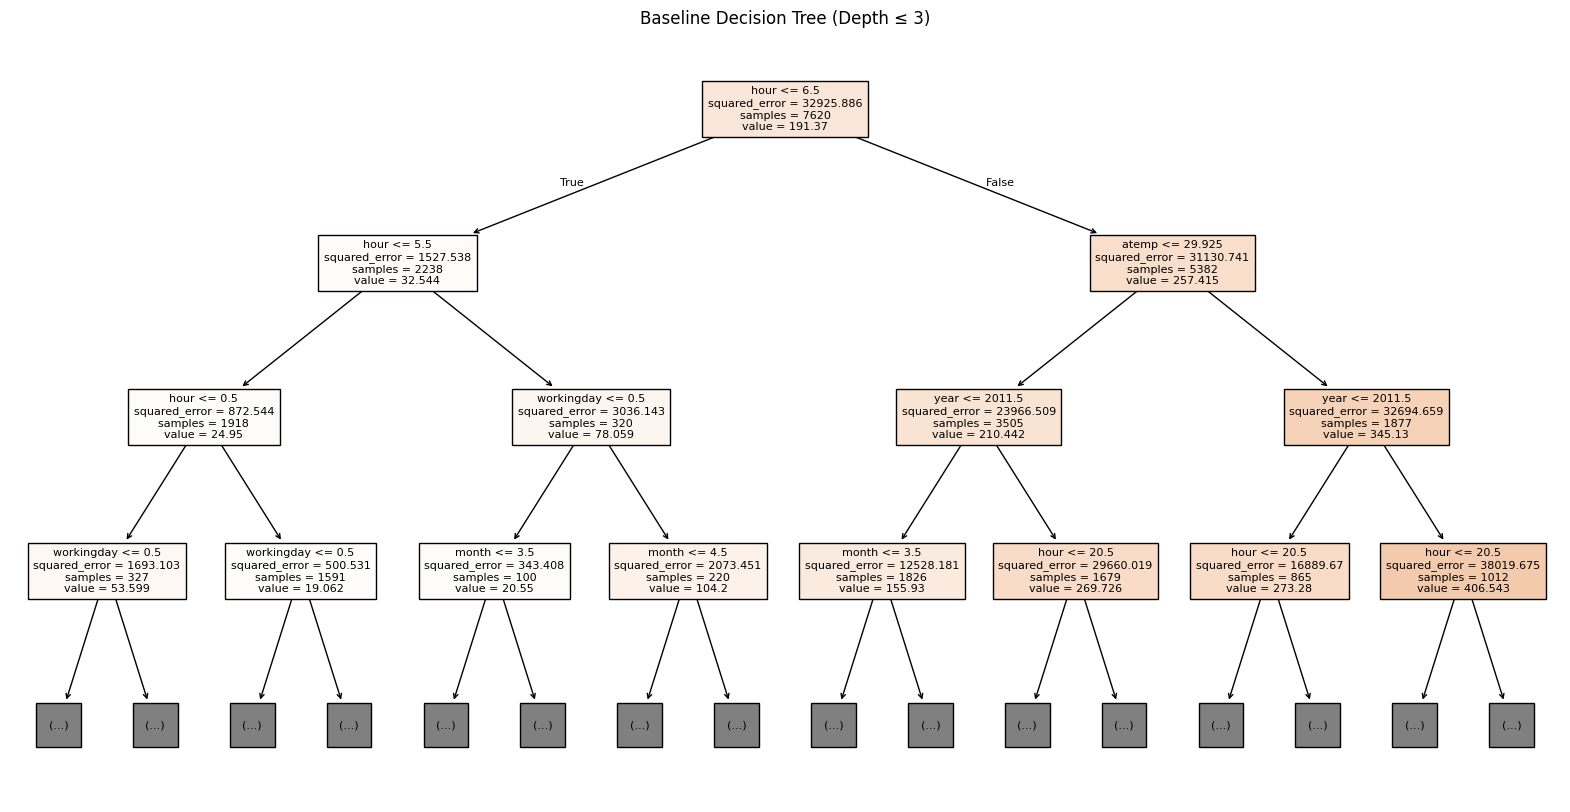

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_baseline,
    feature_names=X_train.columns,
    filled=True,
    max_depth=3,
    fontsize=8
)
plt.title("Baseline Decision Tree (Depth ≤ 3)")
plt.show()


**Step 20 :** Trains a Decision Tree with controlled depth and minimum leaf size.

In [ ]:
dt_tuned = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=20,
    random_state=42
)

dt_tuned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, random_state=42)

**Step 21 :** Generates predictions on the validation set and computes error metrics.

In [ ]:
y_val_pred_tuned = dt_tuned.predict(X_val)

tuned_mse = mean_squared_error(y_val, y_val_pred_tuned)
tuned_r2 = r2_score(y_val, y_val_pred_tuned)

print("Tuned Decision Tree")
print("Validation MSE:", tuned_mse)
print("Validation R²:", tuned_r2)


Tuned Decision Tree
Validation MSE: 4255.56952013231
Validation R²: 0.8669933140816842


**Step 22 :** Plotting the fitted Tuned DescisionTreeRegressor Model.

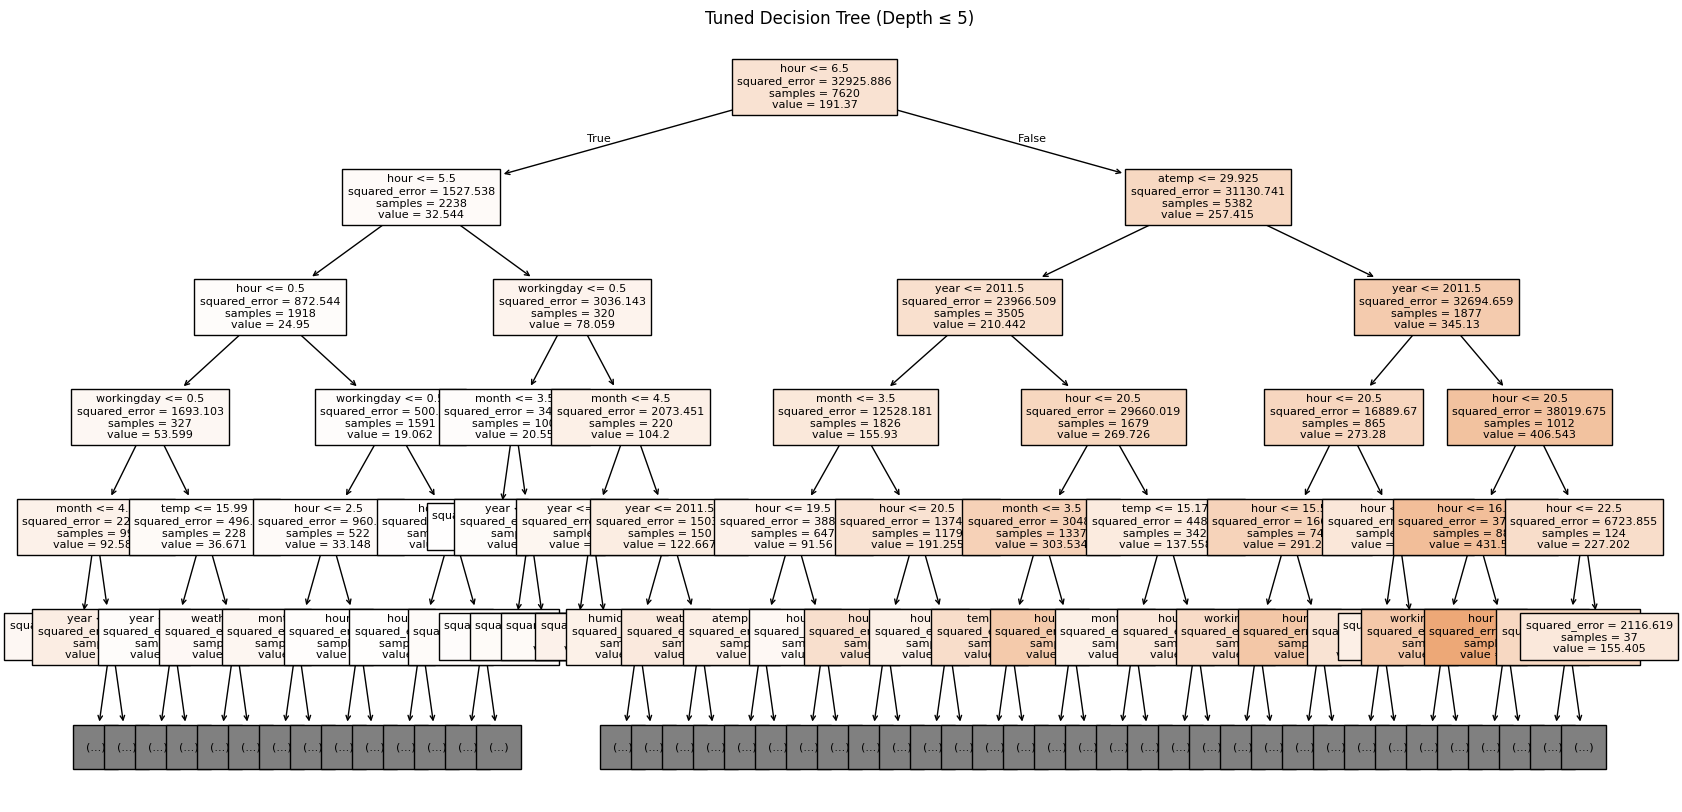

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    dt_tuned,
    feature_names=X_train.columns,
    filled=True,
    max_depth=5,
    fontsize=8
)
plt.title("Tuned Decision Tree (Depth ≤ 5)")
plt.show()


**Step 23 :** Comparing the Baseline

In [ ]:
comparison = pd.DataFrame({
    "Model": ["Baseline DT", "Tuned DT"],
    "Validation MSE": [base_mse, tuned_mse],
    "Validation R²": [base_r2, tuned_r2]
})

comparison


,Model,Validation MSE,Validation R²
0,Baseline DT,3549.814452,0.889051
1,Tuned DT,4255.569520,0.866993


**Step 22 :** Evaluating the Tuned best DecisionTreeRegressor Model on the test data

In [ ]:
y_test_pred_dt = dt_tuned.predict(X_test)

test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print("Decision Tree Test Performance")
print("Test MSE:", test_mse_dt)
print("Test R²:", test_r2_dt)


Decision Tree Test Performance
Test MSE: 3954.790848956189
Test R²: 0.8804663773233138


**Step 25 :** Visualizes how closely predictions match actual values.

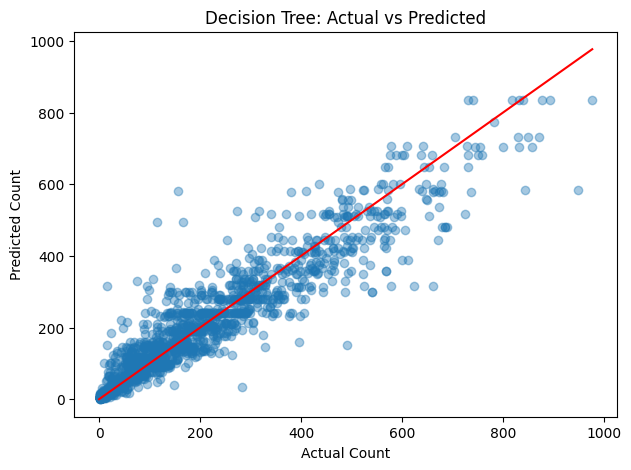

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred_dt, alpha=0.4)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Decision Tree: Actual vs Predicted")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()


### Conclusion
The tuned Decision Tree Regressor outperformed the baseline model by effectively capturing non-linear patterns in bike rental demand while avoiding overfitting. This demonstrates the suitability of decision trees as a moderate-complexity model for this task and highlights the importance of controlled model tuning.

In [ ]:
# Saving the Model and configs for later use for HARD task in practical.
import os

MODEL_DIR = "moderate"
os.makedirs(MODEL_DIR, exist_ok=True)

MODEL_DIR


'moderate'

In [ ]:
import joblib

joblib.dump(dt_tuned, f"{MODEL_DIR}/dt_model.joblib")


['moderate/dt_model.joblib']

In [ ]:
import json

dt_config = {
    "model_type": "DecisionTreeRegressor",
    "max_depth": dt_tuned.max_depth,
    "min_samples_leaf": dt_tuned.min_samples_leaf,
    "random_state": dt_tuned.random_state,
    "criterion": dt_tuned.criterion
}

with open(f"{MODEL_DIR}/dt_config.json", "w") as f:
    json.dump(dt_config, f, indent=4)


In [ ]:
feature_columns = list(X_train.columns)

with open(f"{MODEL_DIR}/feature_columns.json", "w") as f:
    json.dump(feature_columns, f, indent=4)


In [ ]:
readme_text = """
Decision Tree Regressor – DS8

Trained on: Bike Sharing Demand Dataset
Purpose: Moderate model for demand prediction
Hyperparameters:
- max_depth = 10
- min_samples_leaf = 20

Use dt_model.joblib for inference.
Ensure feature order matches feature_columns.json.
"""

with open(f"{MODEL_DIR}/README.txt", "w") as f:
    f.write(readme_text)


In [ ]:
loaded_model = joblib.load(f"{MODEL_DIR}/dt_model.joblib")

assert loaded_model.max_depth == dt_tuned.max_depth
assert loaded_model.min_samples_leaf == dt_tuned.min_samples_leaf

print("Model saved and verified successfully.")


Model saved and verified successfully.
